In [ ]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import csv


import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
data = pd.read_csv("Consumer_Complaints.csv")

In [ ]:
frame = DataFrame(data)

frame.columns = ["Date_received",
                 "Product",
                 "Sub-product",
                 "Issue",
                 "Sub-issue",
                 "Consumer_complaint_narrative",
                 "Company_public_response",
                 "Company",
                 "State",
                 "ZIP_code",
                 "Tags",
                 "Consumer_consent_provided",
                 "Submitted_via",
                 "Date_sent_to_company",
                 "Company_response_to_consumer",
                 "Timely_response",
                 "Consumer_disputed",
                 "Complaint_ID"
                 ]

In [ ]:
allColNames = frame.columns.values

In [ ]:
print(allColNames)

In [6]:
subViaType = frame.Submitted_via.unique()

### print all submitt types

In [7]:
print(subViaType)

['Referral' 'Web' 'Phone' 'Fax' 'Postal mail' 'Email']


In [8]:
timelyRes = frame.Timely_response.unique()

### print all timely Response types

In [9]:
print(timelyRes)

['Yes' 'No']


In [10]:
dfRef = frame[frame.Submitted_via == "Referral"]
dfWeb = frame[frame.Submitted_via == "Web"]
dfPhone = frame[frame.Submitted_via == "Phone"]
dfFax = frame[frame.Submitted_via == "Fax"]
dfPos = frame[frame.Submitted_via == "Postal mail"]
dfEmail = frame[frame.Submitted_via == "Email"]

In [11]:
print(len(dfRef),len(dfWeb),len(dfPhone),len(dfFax),len(dfPos),len(dfEmail))
num1,num2,num3,num4,num5,num6 = len(dfRef),len(dfWeb),len(dfPhone),len(dfFax),len(dfPos),len(dfEmail)

141845 624993 57808 11901 54593 351


In [ ]:
subTypeSer = pd.Series((num1,num2,num3,num4,num5,num6), 
                       index=['Referral', 'Web', 'Phone', 'Fax','Postal mail','Email'],name=' ')

pltt = subTypeSer.plot.pie(figsize=(10, 10),autopct='%.2f', fontsize=40)

pltt.set_title('Model Of Submission',fontsize=25)
plt.savefig("submitted_via.svg", format="svg")

In [13]:
dfRefYes = dfRef[dfRef.Timely_response == "Yes"]
dfWebYes = dfWeb[dfWeb.Timely_response == "Yes"]
dfPhoneYes = dfPhone[dfPhone.Timely_response == "Yes"]
dfFaxYes = dfFax[dfFax.Timely_response == "Yes"]
dfPosYes = dfPos[dfPos.Timely_response == "Yes"]
dfEmailYes = dfEmail[dfEmail.Timely_response == "Yes"]


numYes1,numYes2,numYes3,numYes4,numYes5,numYes6 = len(dfRefYes),len(dfWebYes),len(dfPhoneYes),len(dfFaxYes),len(dfPosYes),len(dfEmailYes)
print(numYes1,numYes2,numYes3,numYes4,numYes5,numYes6)

138971 606614 56008 11609 53596 341


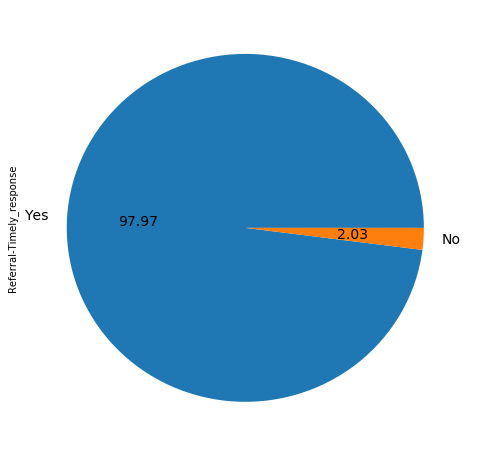

In [14]:
subTypeSer = pd.Series((numYes1,num1 - numYes1), 
                       index=['Yes', 'No'], name='Referral-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

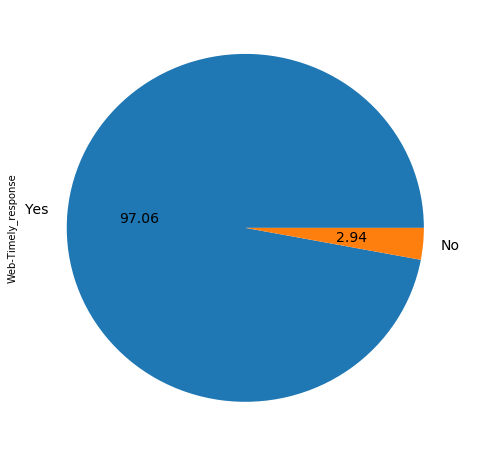

In [15]:
subTypeSer = pd.Series((numYes2,num2 - numYes2), 
                       index=['Yes', 'No'], name='Web-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

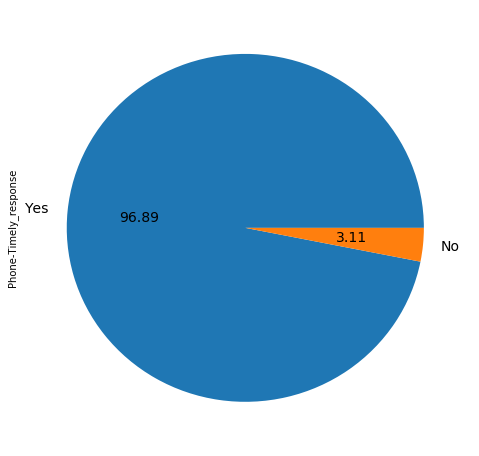

In [16]:
subTypeSer = pd.Series((numYes3,num3 - numYes3), 
                       index=['Yes', 'No'], name='Phone-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

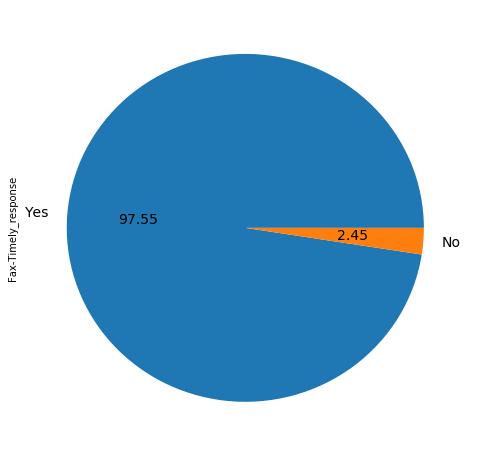

In [17]:
subTypeSer = pd.Series((numYes4,num4 - numYes4), 
                       index=['Yes', 'No'], name='Fax-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

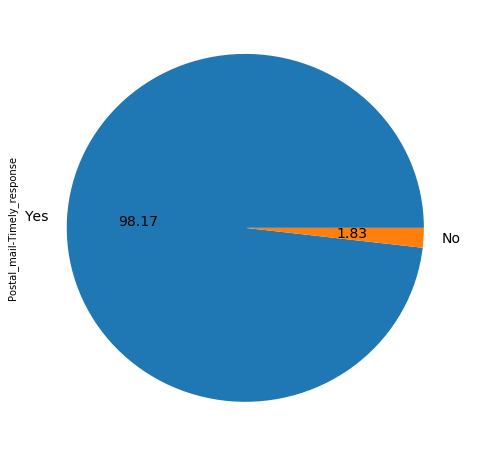

In [18]:
subTypeSer = pd.Series((numYes5,num5 - numYes5), 
                       index=['Yes', 'No'], name='Postal_mail-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

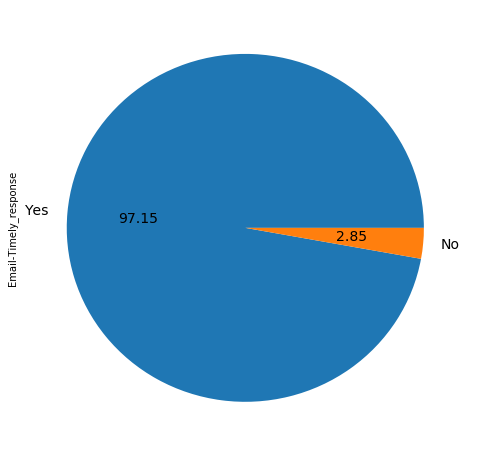

In [19]:
subTypeSer = pd.Series((numYes6,num6 - numYes6), 
                       index=['Yes', 'No'], name='Email-Timely_response')

subTypeSer.plot.pie(figsize=(8, 8),autopct='%.2f', fontsize=14)

### type of products

In [20]:
product = frame.Product.unique()
print(product)

['Mortgage' 'Credit reporting' 'Consumer Loan' 'Credit card'
 'Debt collection' 'Student loan' 'Bank account or service'
 'Other financial service' 'Prepaid card' 'Money transfers'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Payday loan' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Credit card or prepaid card' 'Vehicle loan or lease'
 'Payday loan, title loan, or personal loan' 'Virtual currency']


In [21]:
listPro = []
for i in product:
    item = i.replace(' ', '_')
    listPro.append(frame[frame.Product == i])
    

In [22]:
print(len(listPro))
#print(listPro)

18


In [23]:
productCount = [ len(i) for i in listPro]

    
    

In [24]:
print(productCount)

[240770, 140424, 31607, 89190, 169110, 38138, 86207, 1059, 3819, 5353, 53866, 5546, 9013, 2033, 10769, 2557, 2012, 18]


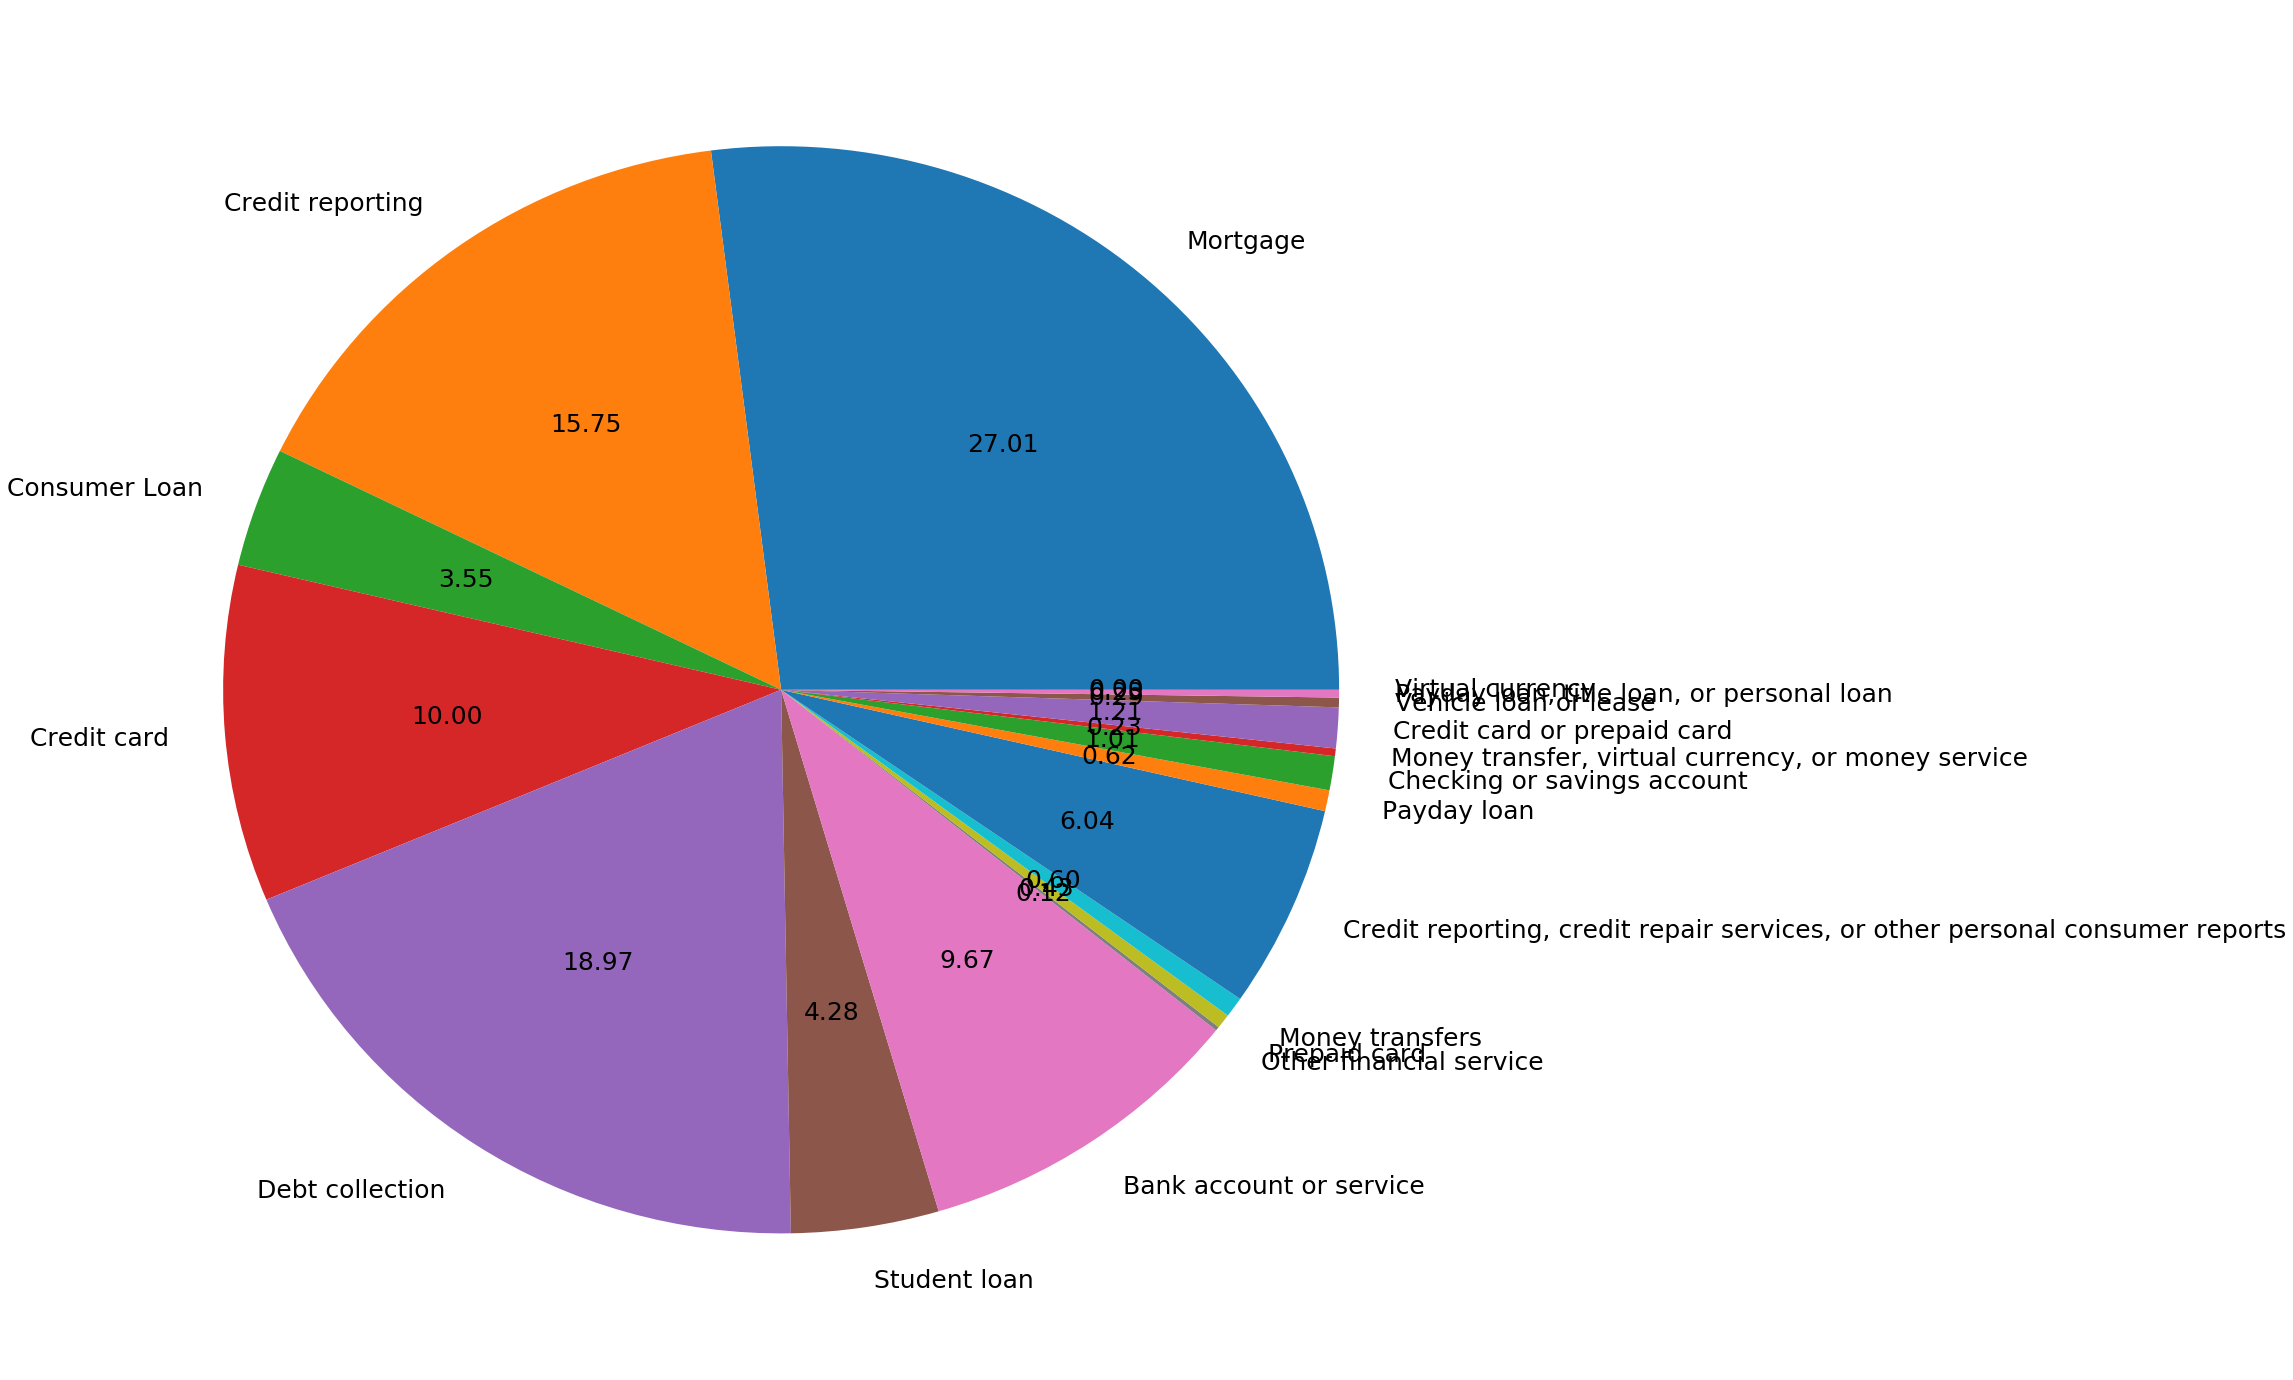

In [25]:
subTypeSer = pd.Series(productCount, 
                       index= product, name=' ')

subTypeSer.plot.pie(figsize=(25, 25),autopct='%.2f', fontsize=25)

In [26]:
dicPro = {}
dicPro['other'] = 0
for i,v in enumerate(productCount):
    if v < 30000:
        dicPro['other']  += v
    else:
        dicPro[product[i]] = v
    
print(dicPro)



{'other': 42179, 'Mortgage': 240770, 'Credit reporting': 140424, 'Consumer Loan': 31607, 'Credit card': 89190, 'Debt collection': 169110, 'Student loan': 38138, 'Bank account or service': 86207, 'Credit reporting, credit repair services, or other personal consumer reports': 53866}


dict_values([42179, 240770, 140424, 31607, 89190, 169110, 38138, 86207, 53866])
dict_keys(['other', 'Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card', 'Debt collection', 'Student loan', 'Bank account or service', 'Credit reporting, credit repair services, or other personal consumer reports'])


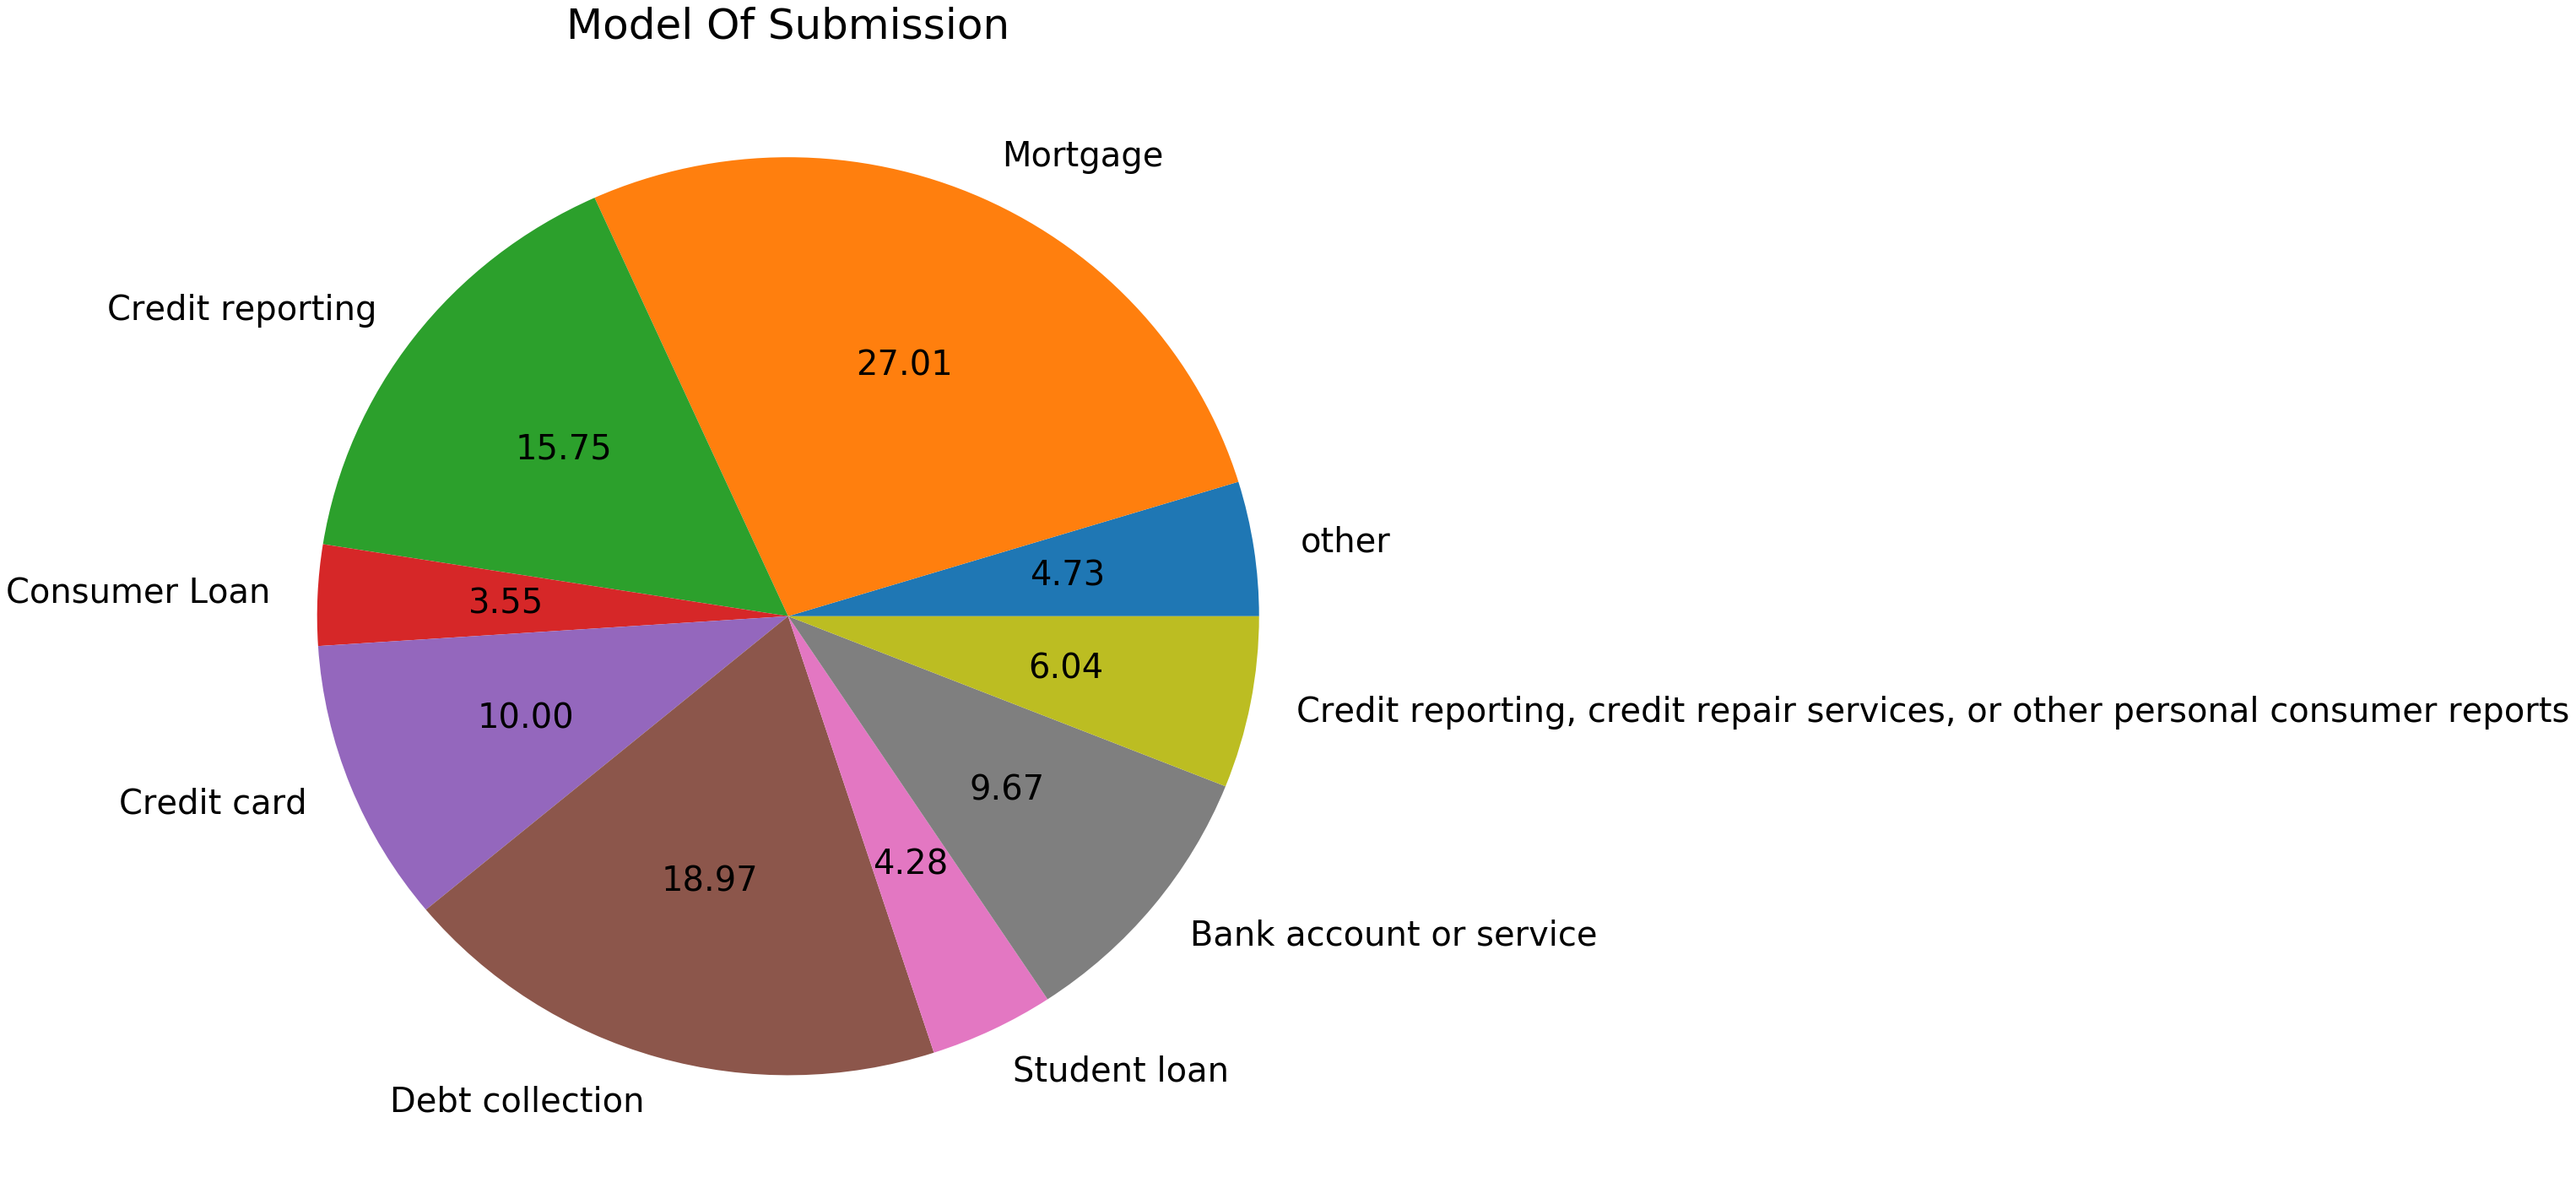

In [30]:
print (dicPro.values())
print (dicPro.keys())
a = list(dicPro.values())
b = list(dicPro.keys())
subTypeSer = pd.Series(a, index= b, name='')

pltt = subTypeSer.plot.pie(figsize=(25, 25),autopct='%.2f', fontsize=40)
pltt.set_title('Complaints Based on Products',fontsize=50)
plt.savefig("disputed-by-product.svg", format="svg")

In [31]:
listProYes = [ i[i.Consumer_disputed == "Yes"] for i in listPro]
listProYesCount = [len(i) for i in listProYes ]
print(listProYesCount)

[51369, 22113, 6771, 18204, 25634, 5936, 16028, 199, 536, 782, 0, 797, 0, 0, 0, 0, 0, 9]


[0.21335299248245213, 0.15747308152452572, 0.21422469706077768, 0.2041035990581904, 0.1515818106557862, 0.15564528816403586, 0.18592457689050773, 0.18791312559017942, 0.14035087719298245, 0.14608630674388193, 0.0, 0.14370717634331048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]


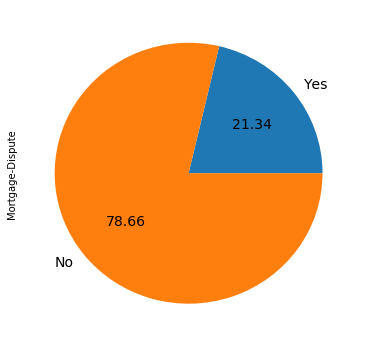

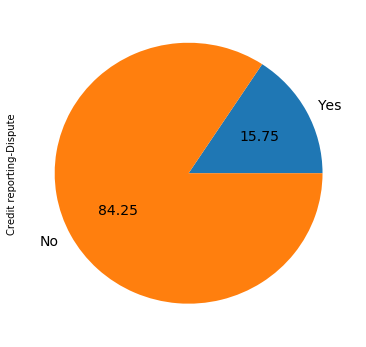

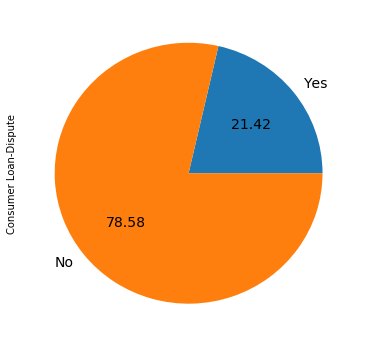

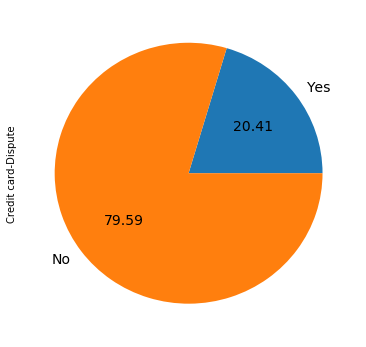

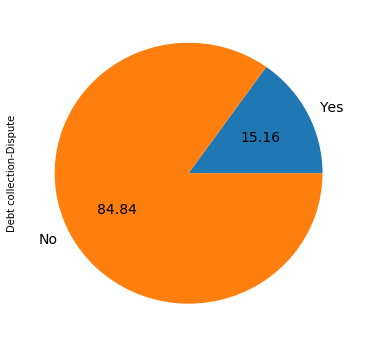

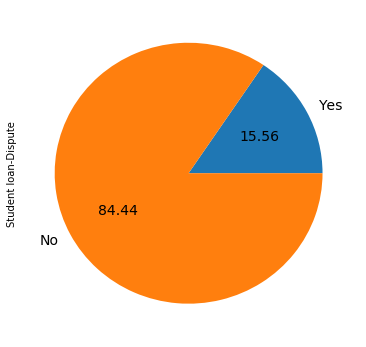

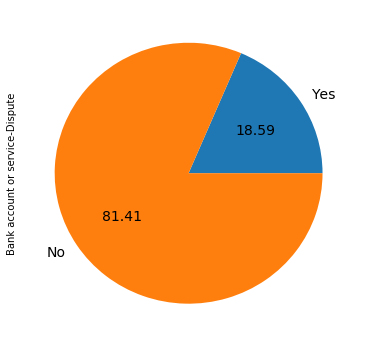

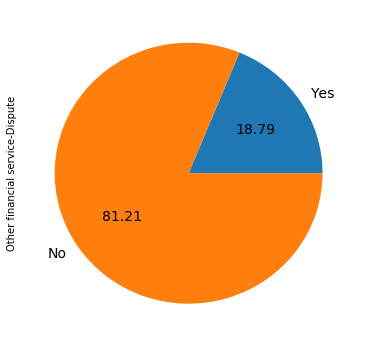

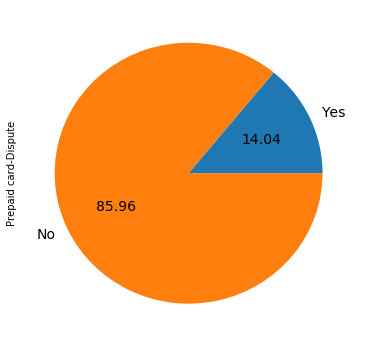

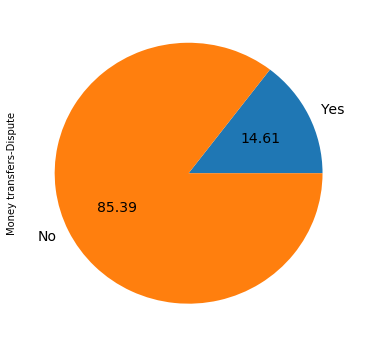

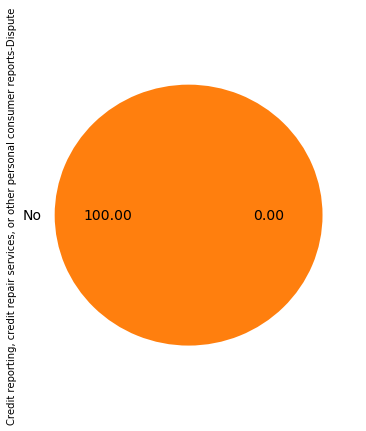

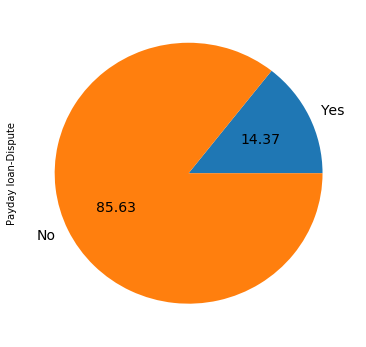

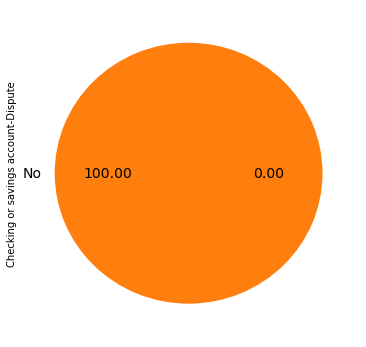

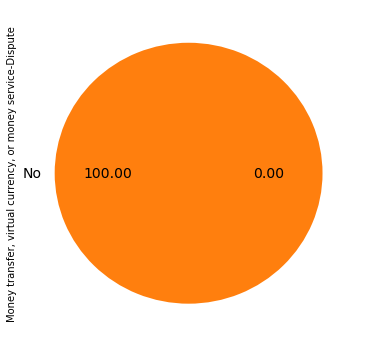

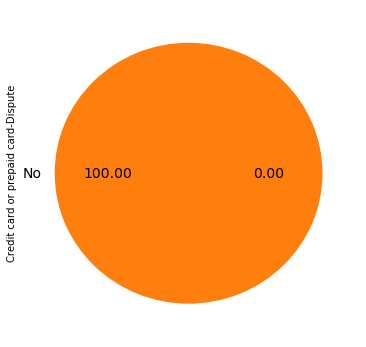

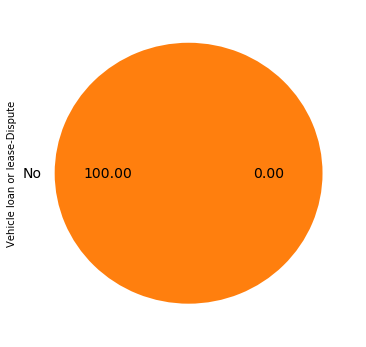

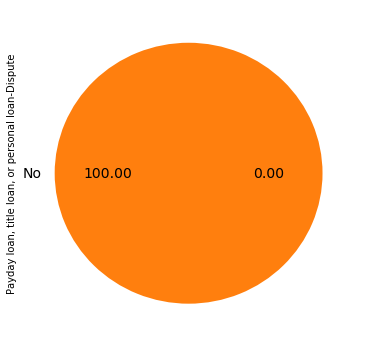

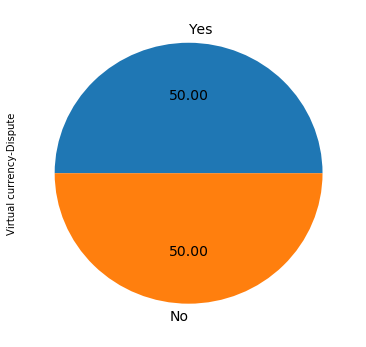

In [32]:
res = []
yesCount = []
noCount = []
for i,prod in enumerate(product):
    yesCount.append(listProYesCount[i])
    noCount.append(productCount[i] - listProYesCount[i])
    
    res.append( listProYesCount[i] /(productCount[i]))
    plt.figure(i)

    subTypeSer = pd.Series((listProYesCount[i], (productCount[i] - listProYesCount[i])), 
                       index=['Yes', 'No'], name= str(prod) + '-Dispute')
    
    subTypeSer.plot.pie(figsize=(6, 6),autopct='%.2f', fontsize=14)

    
    
   

print(res)    
#subTypeSer.plot.pie(figsize=(6, 6),autopct='%.2f', fontsize=14)



    

In [33]:
print(np.random.rand(10, 4))
print(yesCount)
print(noCount)

[[ 0.47524777  0.39822967  0.45049699  0.95378799]
 [ 0.74949169  0.35114614  0.05158634  0.48159952]
 [ 0.40784751  0.12930889  0.14477917  0.09373112]
 [ 0.53146021  0.20397807  0.99759466  0.65067608]
 [ 0.69937249  0.60996531  0.5345192   0.72583209]
 [ 0.48713038  0.06325663  0.7243812   0.025914  ]
 [ 0.53916082  0.15114936  0.07820936  0.02702564]
 [ 0.49151272  0.72883142  0.21008099  0.41240702]
 [ 0.96754821  0.65759762  0.17534723  0.20748286]
 [ 0.67647402  0.28244769  0.16104583  0.96394771]]
[51369, 22113, 6771, 18204, 25634, 5936, 16028, 199, 536, 782, 0, 797, 0, 0, 0, 0, 0, 9]
[189401, 118311, 24836, 70986, 143476, 32202, 70179, 860, 3283, 4571, 53866, 4749, 9013, 2033, 10769, 2557, 2012, 9]


In [34]:
# prod = [i for i in product]
# print(len(prod))
# y_pos = np.arange(len(people))
# bottomdata = yesCount
# topdata = noCount
# fig = plt.figure(figsize=(10,len(prod)))
# ax = fig.add_subplot(111)
# ax.barh(y_pos, bottomdata,align='center')
# ax.barh(y_pos, topdata,align='center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(prod)
# ax.set_xlabel('Distance')

# plt.show()

In [35]:
df2 = pd.DataFrame([ [yesCount[i],noCount[i]] for i,v in enumerate(yesCount) ], columns=['Yes', 'No'])

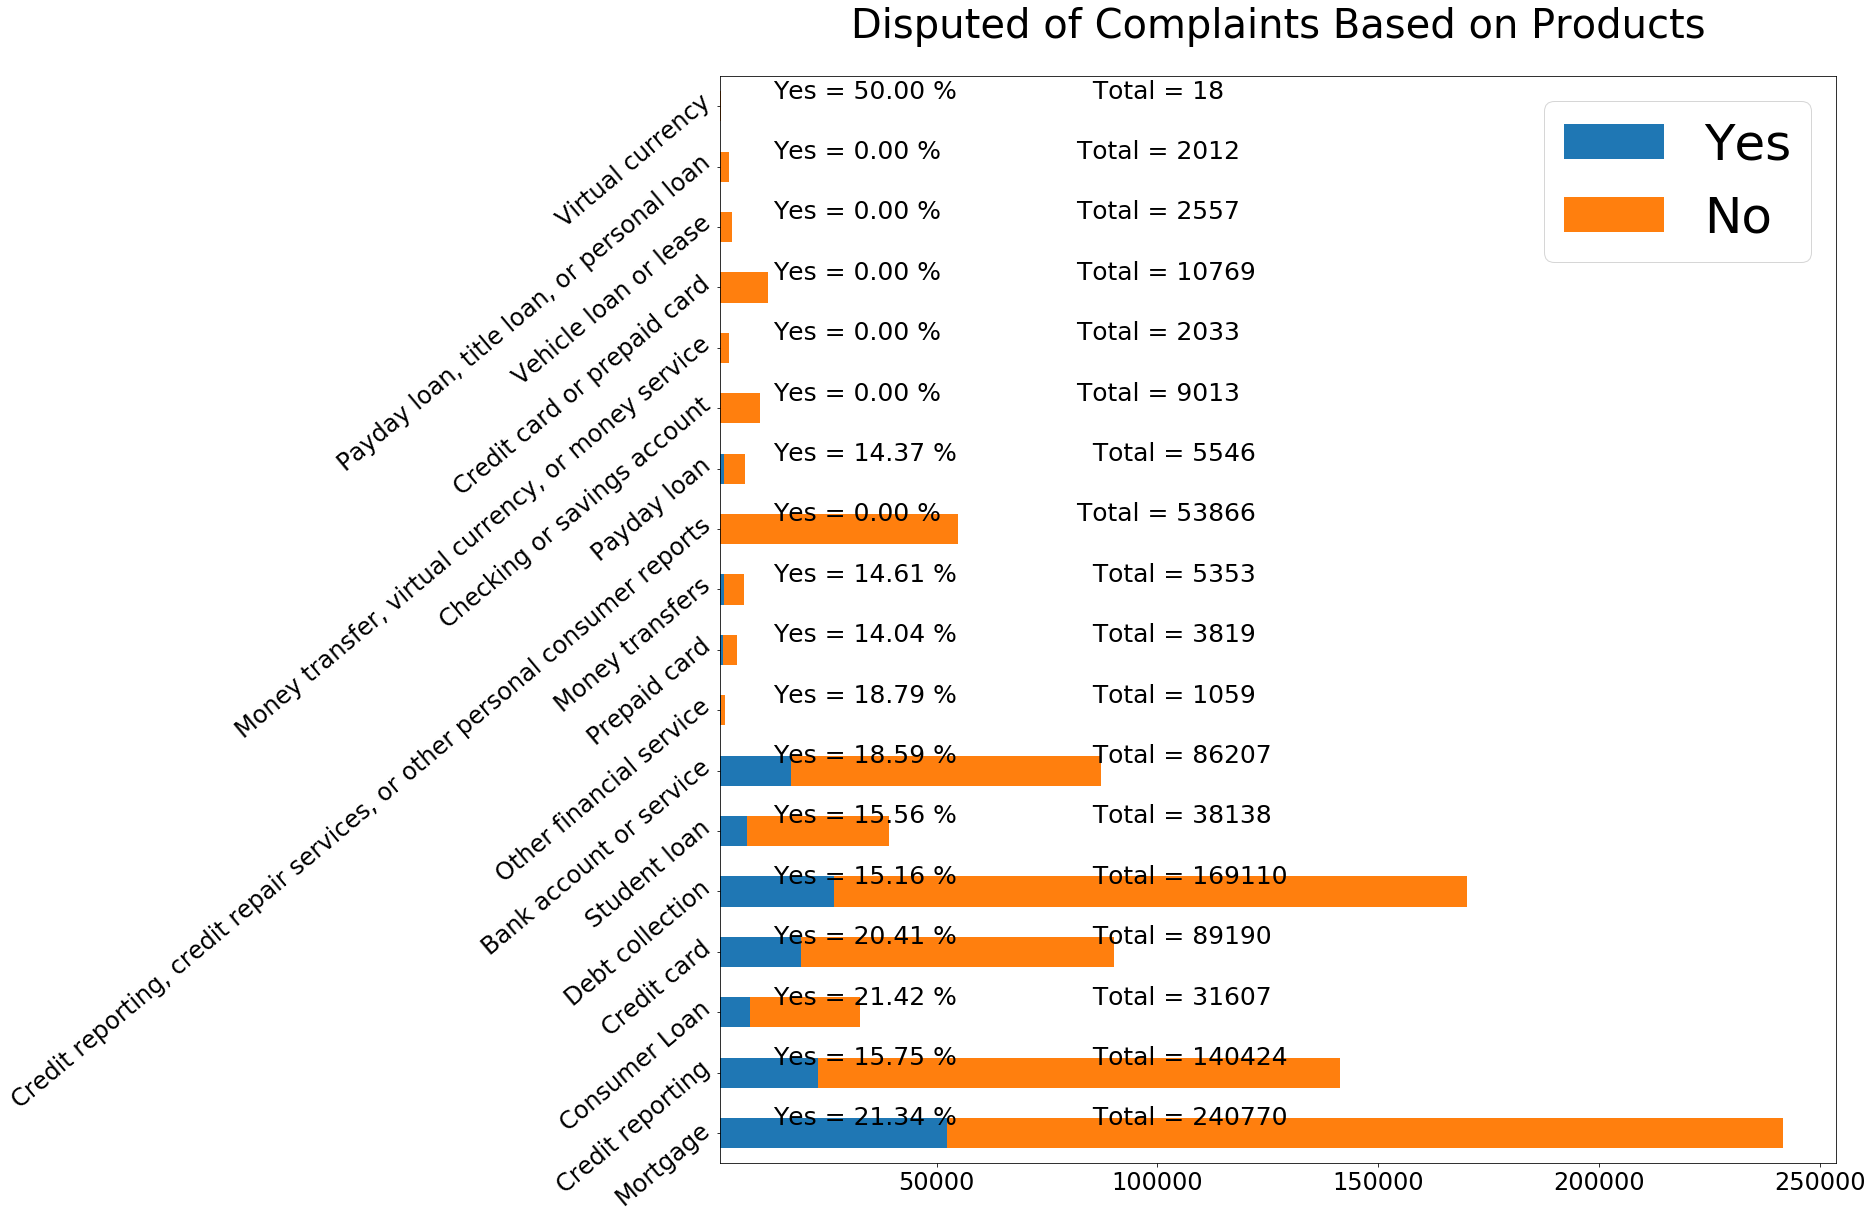

In [36]:

#pltt = plt.figure(figsize=(10,4))
pltt = df2.plot.barh(stacked=True,left = 1000,fontsize=24,figsize=(20,20))
pltt.set_yticklabels([i for i in product],rotation=40,minor=False,rotation_mode='anchor')
pltt.legend(fontsize=50)

pltt.set_title('Disputed of Complaints Based on Products',fontsize=40,y=1.03)

for i, v in enumerate([j for j in yesCount]):
    line = 'Yes = ' + str("%.2f" % (v * 100 /float(productCount[i])) ) + ' %' + '                 Total = ' + str(productCount[i])
    pltt.text(13000, i + .14, line,fontsize=25)

plt.savefig("disputed-of-complaints.svg", format="svg")
plt.show()

## Company   ->   dispute(   percentage      pie   chart

In [37]:
company = frame.Company.unique()
print(company)

['M&T BANK CORPORATION' 'TRANSUNION INTERMEDIATE HOLDINGS, INC.'
 'CITIZENS FINANCIAL GROUP, INC.' ..., 'Inlanta Mortgage, Inc.'
 'Law Offices of Erik Graeff, PC' 'Pipeline Ventures']


In [38]:
print(len(company))

4458


In [39]:
listComp = []
for i in company:
    item = i.replace(' ', '_')
    listComp.append(frame[frame.Company == i])

In [40]:
compCount = sorted([len(i) for i in listComp])
print(compCount)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [41]:
compCountDict = {}
listComp = []
for i in company:
    tem = frame[frame.Company == i]
    if len(tem) > 10000:
        compCountDict[len(tem)] = i
        listComp.append(tem)

In [42]:
print(len(listComp))

14


In [43]:
print(compCountDict)

{52225: 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 38068: 'CITIBANK, N.A.', 13528: 'U.S. BANCORP', 57937: 'Experian Information Solutions Inc.', 25358: 'OCWEN LOAN SERVICING LLC', 68678: 'EQUIFAX, INC.', 58034: 'WELLS FARGO & COMPANY', 12247: 'Ditech Financial LLC', 17381: 'NATIONSTAR MORTGAGE', 21569: 'Navient Solutions, LLC.', 46874: 'JPMORGAN CHASE & CO.', 70041: 'BANK OF AMERICA, NATIONAL ASSOCIATION', 14861: 'SYNCHRONY FINANCIAL', 23066: 'CAPITAL ONE FINANCIAL CORPORATION'}


In [44]:
listCompYes = [ i[i.Consumer_disputed == "Yes"] for i in listComp]

In [45]:
listCompYesCount = [len(i) for i in listCompYes ]
print(listCompYesCount)

[5638, 6697, 2652, 5330, 5719, 10079, 11717, 2463, 3764, 3083, 9523, 14387, 1965, 3655]


In [46]:
compCount = [len(i) for i in listComp]
print (compCount)

[52225, 38068, 13528, 57937, 25358, 68678, 58034, 12247, 17381, 21569, 46874, 70041, 14861, 23066]


[('TRANSUNION INTERMEDIATE HOLDINGS, INC.', 0.1079559597893729), ('CITIBANK, N.A.', 0.17592203425449196), ('U.S. BANCORP', 0.19603784742755767), ('Experian Information Solutions Inc.', 0.09199647893401454), ('OCWEN LOAN SERVICING LLC', 0.22553040460604148), ('EQUIFAX, INC.', 0.14675733131424912), ('WELLS FARGO & COMPANY', 0.20189888685942722), ('Ditech Financial LLC', 0.20111047603494733), ('NATIONSTAR MORTGAGE', 0.2165583107991485), ('Navient Solutions, LLC.', 0.14293662200380175), ('JPMORGAN CHASE & CO.', 0.20316166744890557), ('BANK OF AMERICA, NATIONAL ASSOCIATION', 0.20540826087577277), ('SYNCHRONY FINANCIAL', 0.13222528766570218), ('CAPITAL ONE FINANCIAL CORPORATION', 0.15845833694615452)]


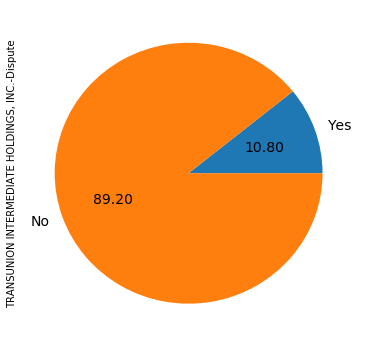

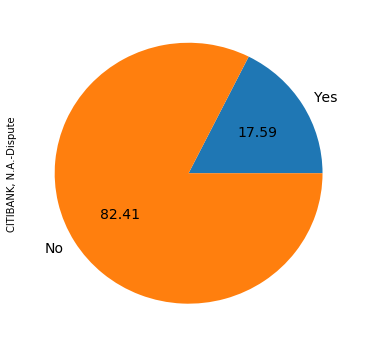

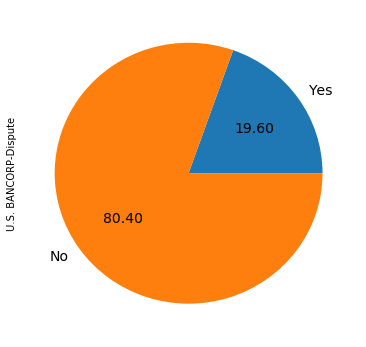

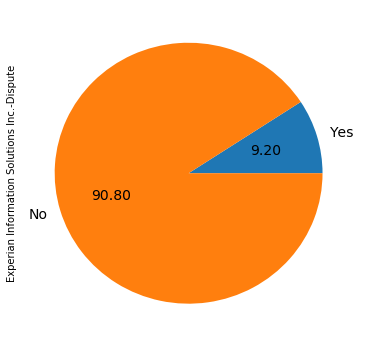

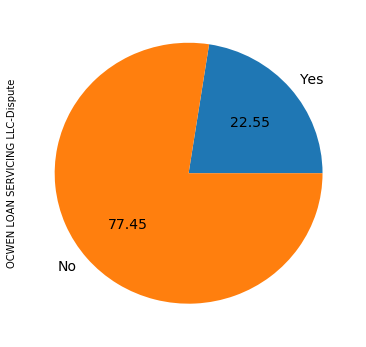

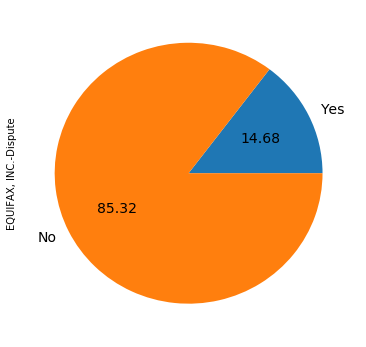

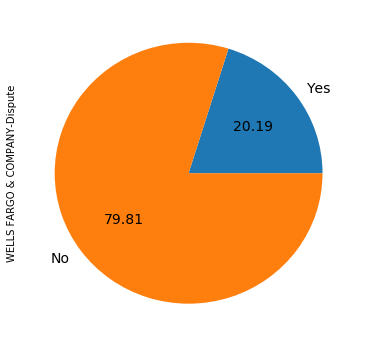

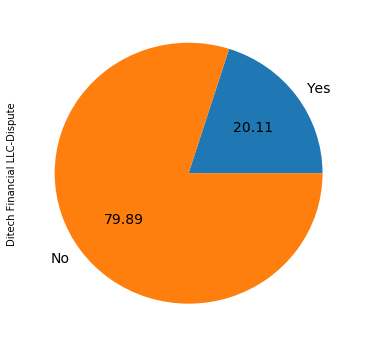

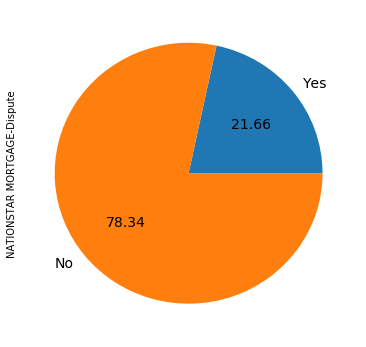

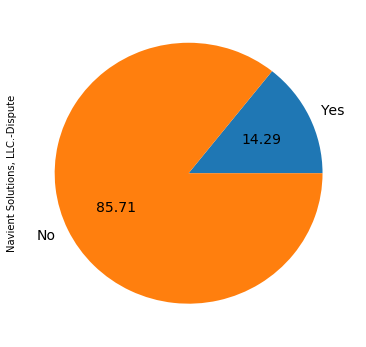

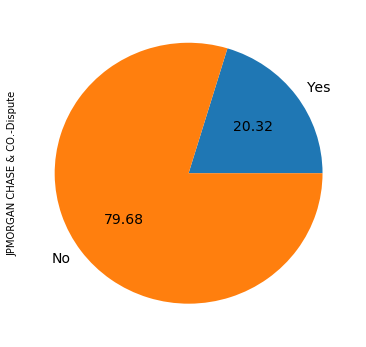

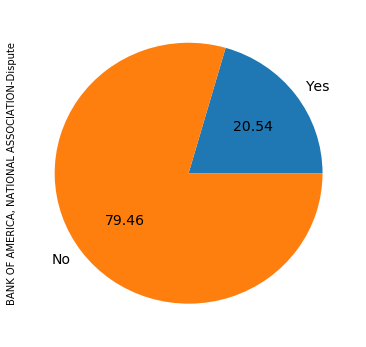

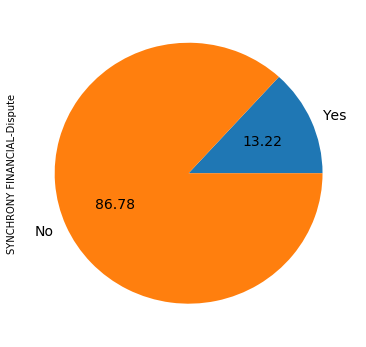

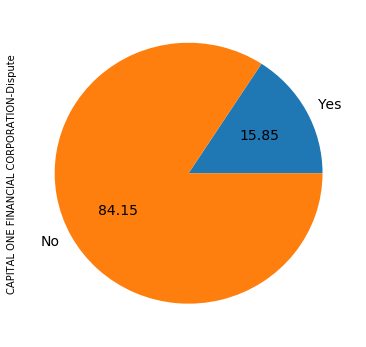

In [47]:
res = []
for i,comp in enumerate(compCount):
    
    res.append((compCountDict[comp],listCompYesCount[i] /comp))
    plt.figure(i)

    subTypeSer = pd.Series((listCompYesCount[i], (comp - listCompYesCount[i])), 
                       index=['Yes', 'No'], name= str(compCountDict[comp]) + '-Dispute')
    
    subTypeSer.plot.pie(figsize=(6, 6),autopct='%.2f', fontsize=14)


print(res)    

In [48]:
listCompNoCount = [ comp - listCompYesCount[i] for i,comp in enumerate(compCount)]
df2 = pd.DataFrame([ [listCompYesCount[i], listCompNoCount[i]] for i,v in enumerate(listCompYesCount) ], columns=['Yes', 'No'])

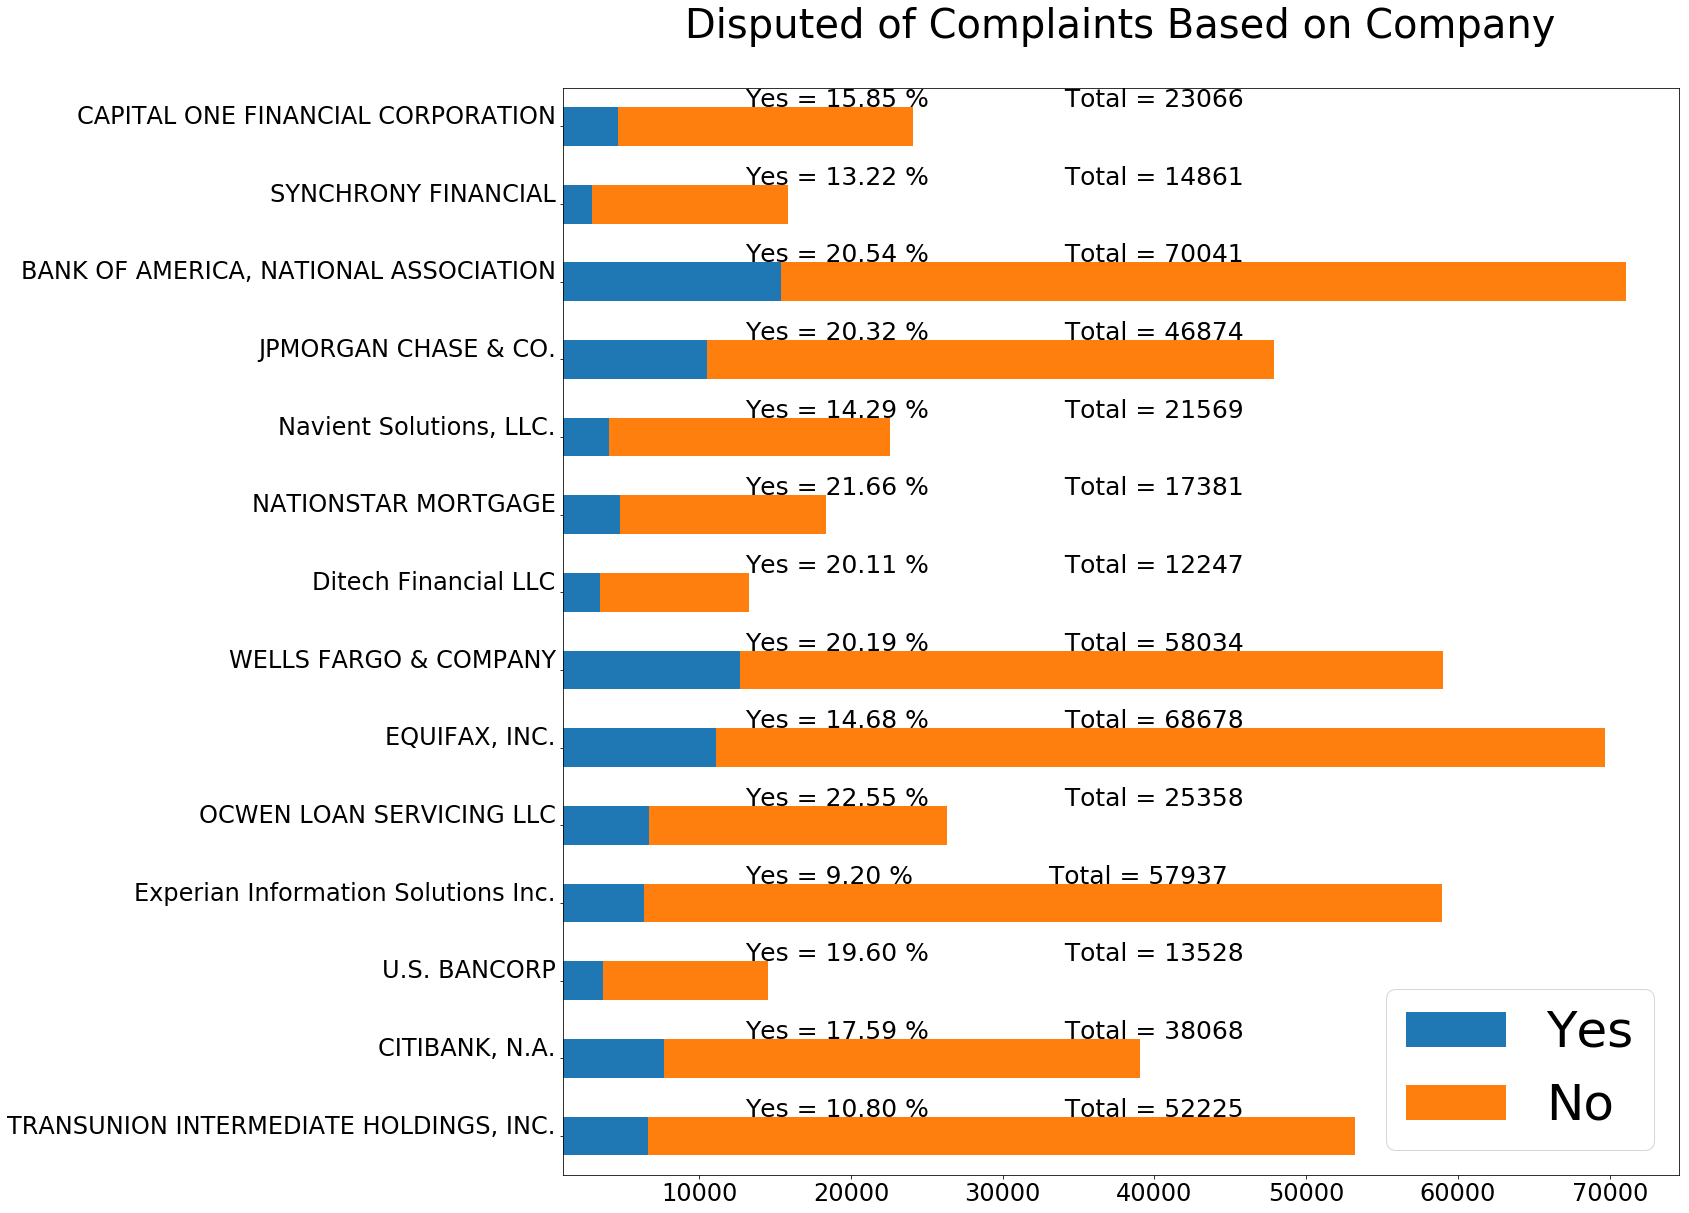

In [49]:
#pltt = plt.figure(figsize=(10,4))
pltt = df2.plot.barh(stacked=True,left = 1000,fontsize=24,figsize=(20,20))
pltt.set_yticklabels([i for i in compCountDict.values()],minor=False,rotation_mode='anchor')
pltt.legend(fontsize=50)

pltt.set_title('Disputed of Complaints Based on Company',fontsize=40,y=1.04)

for i, v in enumerate([j for j in listCompYesCount]):
    line = 'Yes = ' + str("%.2f" % (v * 100 /float(compCount[i])) ) + ' %' + '                 Total = ' + str(compCount[i])
    pltt.text(13000, i + .25, line,fontsize=25)

plt.savefig("disputed-of-complaints-com.svg", format="svg")
plt.show()

In [ ]:
State = list(frame.State.unique())
print(len(State))

In [ ]:
print(State)
StateRem = []
for i in State:
    if str(type(i)) != "<class 'float'>":
        print (type(i),i)
        StateRem.append(i)
        

In [ ]:
print(len(StateRem))

In [ ]:
print(StateRem)

In [ ]:
listState = []
StateDict = {}
for i in StateRem:
    sta = frame[frame.State == i]
    StateDict[len(sta)] = i
    listState.append(frame[frame.State == i])

In [ ]:
StateCount = [len(i) for i in listState]
print(StateCount)
print(StateDict)

In [ ]:
listStaYes = [ i[i.Consumer_disputed == "Yes"] for i in listState]
listStaYesCount = [len(i) for i in listStaYes ]
print(listStaYesCount)

In [ ]:
resSta = []
for i,sCount in enumerate(StateCount):
    
    resSta.append((StateDict[sCount],listStaYesCount[i] /sCount))
#     plt.figure(i)

#     subTypeSer = pd.Series((listStaYesCount[i], (sCount - listStaYesCount[i])), 
#                        index=['Yes', 'No'], name= str(StateDict[sCount]) + '-Dispute')
    
#     subTypeSer.plot.pie(figsize=(6, 6),autopct='%.2f', fontsize=14)


print(resSta) 

In [ ]:
sortedStateRes = sorted(resSta, key = lambda i:i[1])
print(sortedStateRes)

In [ ]:

print(compCountDict)


In [ ]:
# listComp   company's data frame 

compStateYes = {}

for i in listComp:
#    print(len(i))
    compName = compCountDict[len(i)]
#    print(compName)
    comFra = frame[frame.Company == compCountDict[len(i)]]
    compStateYes[compName] = []
    value = []
    for s in StateRem:
        yesPercen = -1
        stateName = s
#        print(stateName)
        staFra = comFra[comFra.State == s]
        yesCount = len(staFra[staFra.Consumer_disputed == "Yes"])
        if len(staFra) > 0:
            yesPercen = yesCount/float(len(staFra))
        value.append((s,yesPercen))
    value = sorted(value,key = lambda v:v[1],reverse = True)
    compStateYes[compName] = value
        

print(compStateYes)
        
        
    
    

{21887: 'MI', 9723: 'AL', 31248: 'PA', 2940: 'ID', 27801: 'VA', 10085: 'MN', 126844: 'CA', 84622: 'FL', 70662: 'TX', 10920: 'NV', 60242: 'NY', 2733: 'NE', 1423: 'MT', 2857: 'ME', 9562: 'WI', 18389: 'WA', 2759: 'RI', 34438: 'NJ', 33194: 'IL', 4501: 'MS', 27048: 'OH', 43808: 'GA', 27412: 'MD', 16886: 'MA', 12144: 'SC', 15173: 'CO', 1216: 'SD', 9659: 'LA', 10149: 'OR', 3712: 'IA', 10068: 'IN', 26041: 'NC', 14240: 'TN', 1367: 'VT', 19773: 'AZ', 4538: 'DE', 11912: 'MO', 4427: 'KS', 2272: 'WV', 2852: 'HI', 905: 'ND', 10393: 'CT', 823: 'WY', 3886: 'NH', 31: 'MP', 5099: 'DC', 4266: 'NM', 6418: 'KY', 4989: 'UT', 3968: 'AR', 5804: 'OK', 2334: 'PR', 255: 'AP', 997: 'AK', 200: 'VI', 30: 'MH', 15: 'AA', 365: 'AE', 138: 'GU', 48: 'FM', 25: 'AS', 13: 'PW'}